In [1]:
import pandas as pd
import time
import duckdb
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
conn = duckdb.connect("mydb1.db")

<h5>Creating the users table</h5>

In [13]:
df_user = conn.execute("""
  CREATE TABLE users AS SELECT * FROM read_parquet('merged/users_merged.parquet')
""")


In [3]:
conn.execute(" DESCRIBE users").df()

,column_name,column_type,null,key,default,extra
0,user_id,BIGINT,YES,NaN,NaN,NaN
1,user_name,VARCHAR,YES,NaN,NaN,NaN
2,email,VARCHAR,YES,NaN,NaN,NaN
3,date_of_birth,VARCHAR,YES,NaN,NaN,NaN
4,address,VARCHAR,YES,NaN,NaN,NaN
5,state,VARCHAR,YES,NaN,NaN,NaN
6,country,VARCHAR,YES,NaN,NaN,NaN


<h5>Creating the Transactions table</h5>

In [9]:
df_user = conn.execute("""
  CREATE TABLE transactions AS SELECT * FROM read_parquet('merged/transactions_merged_all.parquet')
""")

In [4]:
conn.execute(" DESCRIBE transactions").df()

,column_name,column_type,null,key,default,extra
0,transaction_id,BIGINT,YES,NaN,NaN,NaN
1,user_id,BIGINT,YES,NaN,NaN,NaN
2,product_id,VARCHAR,YES,NaN,NaN,NaN
3,product_name,VARCHAR,YES,NaN,NaN,NaN
4,amount,DOUBLE,YES,NaN,NaN,NaN
5,transaction_date,VARCHAR,YES,NaN,NaN,NaN


<h5>Creating the Prodcts table</h5>

In [11]:
df_user = conn.execute("""
  CREATE TABLE products AS SELECT * FROM read_parquet('merged/products_merged.parquet')
""")

In [5]:
conn.execute(" DESCRIBE products").df()

,column_name,column_type,null,key,default,extra
0,product_id,VARCHAR,YES,NaN,NaN,NaN
1,product_name,VARCHAR,YES,NaN,NaN,NaN
2,category,VARCHAR,YES,NaN,NaN,NaN
3,price,DOUBLE,YES,NaN,NaN,NaN


<h3> BASIC ANALYSIS ON THE TABLES </h3>

1. To view the first 10 rows of all the given tables

In [18]:
conn.execute(" select * from users LIMIT 10").df()

,user_id,user_name,email,date_of_birth,address,state,country
0,1001,Michael Hamilton,jacquelineperry@example.net,1944-10-27,"9550 Smith Ridges\nCynthiastad, MH 80405",Kansas,Mexico
1,1002,William Stokes,cory68@example.org,1970-02-15,"2849 Amanda Bridge Suite 535\nNorth Scott, ME ...",Utah,United Kingdom
2,1003,Tammy Archer,reyesjohn@example.net,1955-03-01,"43205 Hopkins Brook\nCaseyborough, UT 13233",Tennessee,Lithuania
3,1004,Chelsea Herrera,vsingh@example.org,1959-01-01,"800 Emily Harbor Apt. 727\nJonesmouth, FL 51151",Indiana,Romania
4,1005,Peter Thomas,ebentley@example.org,1999-10-12,Unit 5504 Box 8656\nDPO AA 32630,Alaska,Togo
5,1006,Pamela Nelson,fostermichael@example.net,1990-01-23,"0959 Samuel Junction\nPort Natalie, MH 99949",Louisiana,Cuba
6,1007,Eric Nguyen,jhuber@example.com,1968-02-25,"5937 Schneider Heights\nPort Stephenville, IA ...",Arizona,Russian Federation
7,1008,Kimberly Burke,reyesmelissa@example.net,1995-12-15,"646 Daniels Trail Suite 903\nThomashaven, FL 6...",Nebraska,Swaziland
8,1009,Steven Blake,ronald02@example.org,1990-02-11,"8619 Michael Divide\nFoxstad, CO 16596",Oklahoma,Qatar
9,1010,Mackenzie Fitzgerald,chadmiller@example.net,1964-03-28,"412 Carter Union Apt. 761\nStacymouth, ND 44214",Montana,Belarus


In [19]:
conn.execute(" select * from products LIMIT 10").df()

,product_id,product_name,category,price
0,P689,blood,Clothing,175.56
1,P802,cultural,Accessories,85.98
2,P821,turn,Clothing,115.44
3,P977,notice,Tools,27.76
4,P403,including,Clothing,55.68
5,P322,will,Tools,29.27
6,P221,push,Tools,76.42
7,P728,anyone,Electronics,35.98
8,P469,everything,Tools,153.82
9,P138,tree,Home,147.97


In [20]:
conn.execute(" select * from transactions LIMIT 10").df()

,transaction_id,user_id,product_id,product_name,amount,transaction_date
0,1,1100,P148,job,50.03,2023-04-27 03:57:05
1,2,1195,P937,never,48.00,2023-05-14 22:55:01
2,3,1934,P244,threat,39.08,2023-06-04 21:53:53
3,4,1081,P113,art,96.16,2023-06-14 10:53:56
4,5,1399,P981,foot,35.09,2023-05-13 05:44:19
5,6,1452,P803,center,77.23,2023-06-27 17:31:51
6,7,1559,P938,doctor,18.84,2023-04-25 23:59:38
7,8,1701,P384,also,96.38,2023-02-19 08:58:17
8,9,1024,P918,control,44.15,2023-07-20 16:28:37
9,10,1822,P112,realize,36.15,2023-06-03 11:56:52


2. Count of total number of rows in each Table

In [21]:
conn.execute("  SELECT count(*) AS user_count FROM users  ").df()



,user_count
0,10100000


In [22]:
conn.execute("  SELECT count(*) AS product_count FROM products  ").df()

,product_count
0,300000


In [23]:
conn.execute("  SELECT count(*) AS transaction_count FROM transactions  ").df()

,transaction_count
0,100000000


3. Statestical data on the transaction Tables

In [24]:
conn.execute("""
             
             SELECT MIN(amount) , MAX(amount) , AVG(amount) FROM transactions
             
             
             """).df()

,min(amount),max(amount),avg(amount)
0,10.0,100.0,55.000622


There is no null values in any of the tables as the data was synthetically created so no need to handle any null values

4. Data Cleaning Procedure:
    Check for duplicate values

In [40]:

duplicate_query = "SELECT transaction_id FROM transactions GROUP BY transaction_id HAVING COUNT(*) > 1"
duplicate_result = conn.execute(duplicate_query)

# Fetch the results as a DataFrame
duplicate_result.df()


,transaction_id


In [30]:
conn.execute("SELECT user_id, user_name, email, date_of_birth, address, state, country, COUNT(*) AS count FROM users GROUP BY user_id, user_name, email, date_of_birth, address, state, country HAVING COUNT(*) > 1").df()

,user_id,user_name,email,date_of_birth,address,state,country,count


In [31]:
conn.execute("SELECT product_id, product_name, category, price, COUNT(*) AS count FROM products GROUP BY product_id, product_name, category, price HAVING COUNT(*) > 1").df()

,product_id,product_name,category,price,count
0,P381,guess,Tools,141.11,2
1,P121,ability,Tools,60.61,2
2,P350,agent,Electronics,178.71,2


We see duplicate values in the product table which nees to be removed


Now removing the duplicates from the products table

In [41]:
conn.execute("""
    delete from products where "product_id" == 'P381' OR "product_id" == 'P121' OR "product_id" == 'P350'



""")

In [42]:
conn.execute("SELECT product_id, product_name, category, price, COUNT(*) AS count FROM products GROUP BY product_id, product_name, category, price HAVING COUNT(*) > 1").df()

,product_id,product_name,category,price,count


<h3>Performing complex aggregated qeries on the tables </h3>

1. Calculating total revenue by category

In [6]:
cur_time = time.time()
result_query = conn.execute("""
    SELECT p.category, SUM(t.amount) AS total_revenue
    FROM transactions t
    JOIN products p ON t.product_id = p.product_id
    GROUP BY p.category
""")

result_df = result_query.df()

print(f"Execution Time: {(time.time() - cur_time)} seconds")

print(result_df)








Execution Time: 397.44533705711365 seconds
      category  total_revenue
0  Accessories   3.647723e+11
1         Home   3.676285e+11
2     Clothing   3.642730e+11
3  Electronics   3.647923e+11
4        Tools   3.655675e+11


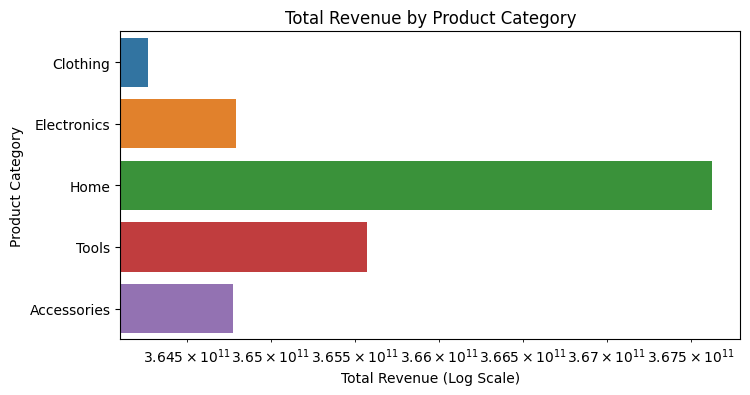

In [41]:
#visualization: bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x="total_revenue", y="category", data=result_df)
plt.xscale('log')
plt.xlabel("Total Revenue (Log Scale)")
plt.ylabel("Product Category")
plt.title("Total Revenue by Product Category")
plt.show()

2. Finding Users with the highest total spending by country

In [48]:
cur_time = time.time()
dfval = conn.execute("""
    SELECT u.country, u.user_id, u.user_name, SUM(t.amount) AS total_spending
    FROM transactions t
    JOIN users u ON t.user_id = u.user_id
    GROUP BY u.country, u.user_id, u.user_name
    ORDER BY total_spending DESC
""")
print(f"execution Time: {(time.time() - cur_time)}")
print(dfval.df())

execution Time: 3.1382761001586914
                country  user_id             user_name  total_spending
0      Papua New Guinea     1020  Alexander Harrington      5561300.86
1        American Samoa     1141      Nicholas Stevens      5555871.22
2              Paraguay     1940            Ryan Bowen      5552657.82
3              Djibouti     1097           Joanna Cobb      5552476.19
4               Jamaica     1158       Jessica Mendoza      5549751.61
..                  ...      ...                   ...             ...
995        South Africa     1248         Leonard Simon      5449612.79
996  Dominican Republic     1084               Mary Wu      5447087.44
997               Macao     1543        Crystal Miller      5446400.19
998              Guinea     1607     Sherri Washington      5445669.39
999           Guatemala     1687         James Johnson      5438982.83

[1000 rows x 4 columns]


3. Calculating the average Transaction amount per day between mar 1 23 00:00:00 till jun 30 23:59:59

In [30]:
from datetime import datetime

cur_time = time.time()
start_date = datetime(2023, 3, 1, 0, 0, 0)  # March 1, 2023, 00:00:00
end_date = datetime(2023, 6, 30, 23, 59, 59)  # June 30, 2023, 23:59:59


result_query = conn.execute(f"""
    SELECT transaction_date AS transaction_day, AVG(amount) AS avg_transaction_amount
    FROM transactions
    WHERE transaction_date BETWEEN '{start_date.strftime('%Y-%m-%d %H:%M:%S')}' AND '{end_date.strftime('%Y-%m-%d %H:%M:%S')}'
    GROUP BY transaction_date
""")


result_df = result_query.df()

print(f"Execution Time: {(time.time() - cur_time)} seconds")

print(result_df)


Execution Time: 20.50181746482849 seconds
              transaction_day  avg_transaction_amount
0         2023-05-01 15:30:32               53.293846
1         2023-05-26 06:18:18               52.541667
2         2023-06-28 00:49:04               60.828750
3         2023-04-20 16:20:51               57.165000
4         2023-04-07 13:32:33               44.558571
...                       ...                     ...
10496037  2023-03-30 02:01:51               31.110000
10496038  2023-03-12 15:36:00               41.470000
10496039  2023-04-15 15:01:44               25.590000
10496040  2023-03-16 09:07:13               63.220000
10496041  2023-06-05 22:11:09               32.490000

[10496042 rows x 2 columns]


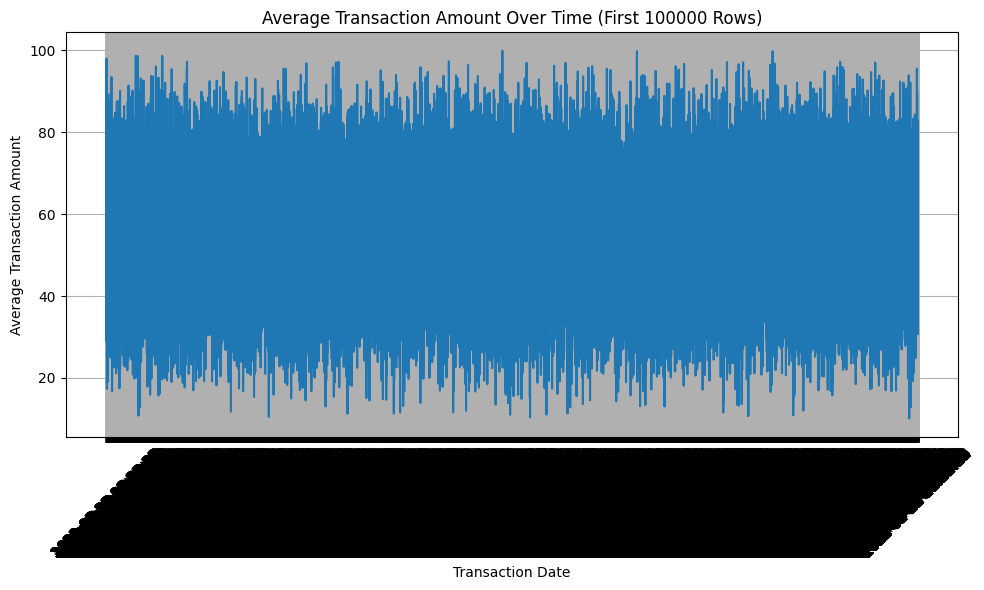

In [32]:
result_df =result_df.head(100000)
plt.figure(figsize=(10, 6))
plt.plot(result_df['transaction_day'], result_df['avg_transaction_amount'])
plt.xlabel("Transaction Date")
plt.ylabel("Average Transaction Amount")
plt.title("Average Transaction Amount Over Time (First 100000 Rows)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

4. Top Selling Product categories wuth average price 


In [57]:
conn.execute(" DESCRIBE users").df()

,column_name,column_type,null,key,default,extra
0,user_id,BIGINT,YES,NaN,NaN,NaN
1,user_name,VARCHAR,YES,NaN,NaN,NaN
2,email,VARCHAR,YES,NaN,NaN,NaN
3,date_of_birth,VARCHAR,YES,NaN,NaN,NaN
4,address,VARCHAR,YES,NaN,NaN,NaN
5,state,VARCHAR,YES,NaN,NaN,NaN
6,country,VARCHAR,YES,NaN,NaN,NaN


In [33]:
cur_time = time.time()


result_query = conn.execute("""
    SELECT p.category, COUNT(*) AS num_transactions, AVG(p.price) AS avg_price
    FROM transactions t
    JOIN products p ON t.product_id = p.product_id
    GROUP BY p.category
    ORDER BY num_transactions DESC
""")


result_df = result_query.df()


execution_time = time.time() - cur_time
print(f"Execution Time: {execution_time} seconds")

print(result_df)

Execution Time: 406.95651483535767 seconds
      category  num_transactions   avg_price
0         Home        6684073368  105.348279
1        Tools        6646594926  105.087792
2  Electronics        6632576248  105.035063
3  Accessories        6632211014  104.951051
4     Clothing        6623093991  104.938675


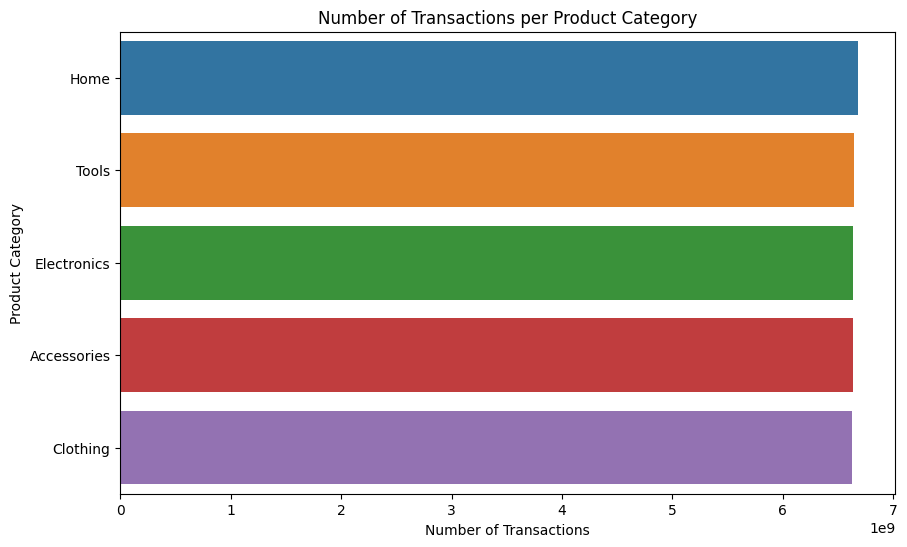

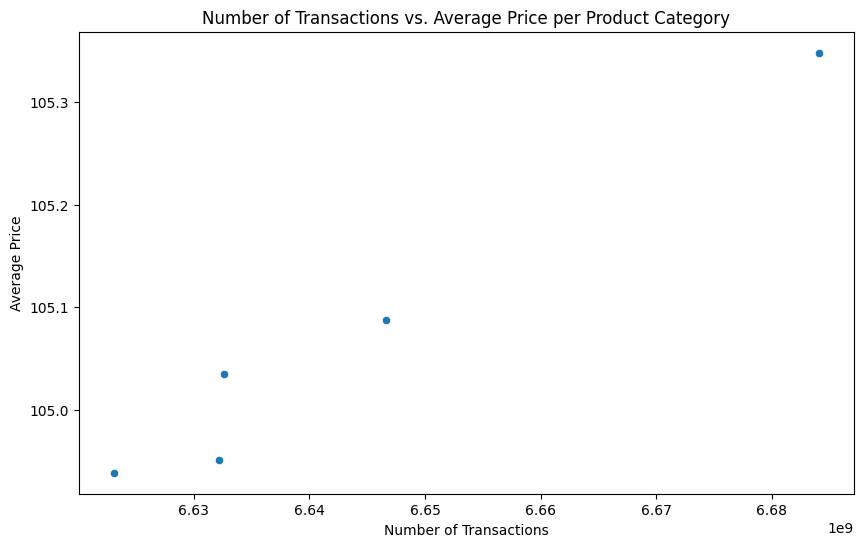

In [34]:
# Visualization 1: Bar chart for number of transactions per category
plt.figure(figsize=(10, 6))
sns.barplot(x="num_transactions", y="category", data=result_df)
plt.xlabel("Number of Transactions")
plt.ylabel("Product Category")
plt.title("Number of Transactions per Product Category")
plt.show()

# Visualization 2: Scatter plot for number of transactions vs. average price per category
plt.figure(figsize=(10, 6))
sns.scatterplot(x="num_transactions", y="avg_price", data=result_df)
plt.xlabel("Number of Transactions")
plt.ylabel("Average Price")
plt.title("Number of Transactions vs. Average Price per Product Category")
plt.show()

5. Grouping users by age and displaying it in ascending order of age 

In [35]:
cur_time = time.time()

# Execute the SQL query to calculate the age and user count
result_query = conn.execute("""
    SELECT DATE_PART('year', NOW()) - DATE_PART('year', CAST(date_of_birth AS TIMESTAMP)) AS age, COUNT(*) AS user_count
    FROM users
    GROUP BY age
    ORDER BY age
""")


result_df = result_query.df()

execution_time = time.time() - cur_time
print(f"Execution Time: {execution_time} seconds")
print(result_df)

Execution Time: 0.23099732398986816 seconds
    age  user_count
0    18       92280
1    19      159864
2    20      160764
3    21      160446
4    22      159855
..  ...         ...
59   77      159859
60   78      160052
61   79      160135
62   80      160216
63   81       67308

[64 rows x 2 columns]


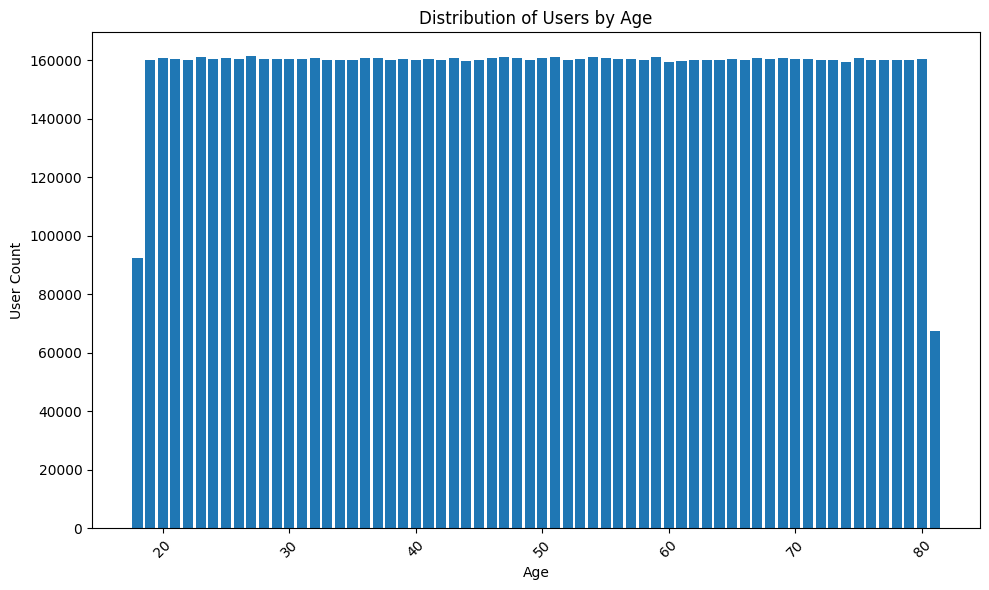

In [36]:
#visualization : histogrram
plt.figure(figsize=(10, 6))
plt.bar(result_df['age'], result_df['user_count'])
plt.xlabel("Age")
plt.ylabel("User Count")
plt.title("Distribution of Users by Age")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Optimizing the query</h3> 

We can see that querry  1. Calculating total revenue by category and 4. Top Selling Product categories wuth average price took substantiall longer time to execte. Lets try optimizing the query by appling certain optimization techniques


1. Applying indexing

In [6]:


# indexing the "category" in products
conn.execute("  DROP INDEX IF EXISTS idx_products_category ")

conn.execute("  DROP INDEX IF EXISTS idx_products_id ")



In [7]:
conn.execute("CREATE INDEX idx_products_category ON products(category)")
conn.execute("CREATE INDEX idx_products_id ON products(product_id)")

In [39]:
conn.execute("  DROP INDEX IF EXISTS idx_transactions_product_id ")
conn.execute("CREATE INDEX idx_transactions_product_id ON transactions(product_id)")

Error: Invalid Error: bad allocation

1. total revenue by category

In [5]:
cur_time = time.time()
result_query = conn.execute("""
    SELECT p.category, SUM(t.amount) AS total_revenue
    FROM transactions t
    JOIN products p ON t.product_id = p.product_id
    GROUP BY p.category
""")

result_df = result_query.df()

print(f"Execution Time: {(time.time() - cur_time)} seconds")

print(result_df)

Execution Time: 352.1788866519928 seconds
      category  total_revenue
0         Home   3.676285e+11
1        Tools   3.655675e+11
2  Electronics   3.647923e+11
3  Accessories   3.647723e+11
4     Clothing   3.642730e+11


we see the exection time reduce from 397 to 352 seconds. Its a 11.3% reduction in unning time

2. top selling product categories with averrage price per category

In [14]:
cur_time = time.time()
result_query = conn.execute("""
    SELECT p.category, COUNT(*) AS num_transactions, AVG(p.price) AS avg_price
    FROM transactions t
    JOIN products p ON t.product_id = p.product_id
    GROUP BY p.category
    ORDER BY num_transactions DESC
""")
result_df = result_query.df()

execution_time = time.time() - cur_time
print(f"Execution Time: {execution_time} seconds")
print(result_df)

Execution Time: 368.6746642589569 seconds
      category  num_transactions   avg_price
0         Home        6684073368  105.348279
1        Tools        6646594926  105.087792
2  Electronics        6632576248  105.035063
3  Accessories        6632211014  104.951051
4     Clothing        6623093991  104.938675


We can see that the execution time reduced from 406 sec to 352 sec, That is a 13.3% percent reduction in running time

2. Window function

 1. give the percentage of amount they spent on each transaction per user

we will have to use window functions here to achieve this, or else we might have to perform a self join on transactions to achive the same result which is resource intensive compared to this.

In [5]:
cur_time = time.time()
result_query = conn.execute("""
    SELECT transaction_id, user_id, amount,
           100.0 * amount / SUM(amount) OVER(PARTITION BY user_id) AS transaction_amount_percentage
    FROM transactions
""")
result_df = result_query.df()
execution_time = time.time() - cur_time
print(f"Execution Time: {execution_time} seconds")
print(result_df)

Execution Time: 195.98186945915222 seconds
          transaction_id  user_id  amount  transaction_amount_percentage
0                 247115     1006   61.54                       0.001126
1                 249029     1006   53.01                       0.000970
2                 250180     1006   46.54                       0.000851
3                 251436     1006   21.00                       0.000384
4                 251933     1006   34.46                       0.000630
...                  ...      ...     ...                            ...
99999995        99910725     1999   82.14                       0.001493
99999996        99915368     1999   54.77                       0.000996
99999997        99915928     1999   14.95                       0.000272
99999998        99916431     1999   82.13                       0.001493
99999999        99917693     1999   85.67                       0.001558

[100000000 rows x 4 columns]


<h1> FORECASTING THE SALES FIGURES OF A NEW PRODUCT </h1>

The goal here is to add a new product to the products table and then predict the sales of that product

In [29]:
# the metrics of the new products
p_id = 'P1000'
p_name = 'Iphone 13'
p_price = 100
p_category = 'Electronics'



In [4]:
conn.execute(""" DELETE FROM products WHERE product_id = 'P1000' """)

In [5]:
conn.execute(f"""
    INSERT INTO products (product_id, product_name, category, price)
    VALUES ('{p_id}', '{p_name}', '{p_category}', {p_price})
""")

In [6]:
data = conn.execute(""" SELECT * FROM products WHERE product_id == 'P1000' """).df()
print(data)

  product_id product_name     category  price
0      P1000    Iphone 13  Electronics  100.0


 The new product 'P1000' has been inserted. 
 1. Since this product doesnt have have an transactional history we need to create some for it.For that we need to find products similar to it.
 2. To achieve that Ive chosen the following strategy
3. Since we dont have much attributes in the products table I assume that the existing products in the same category and around the same price range are similar to the new one

In [30]:
select_attributes_query = f"""
    SELECT category, price
    FROM products
    WHERE product_id = '{p_id}'
"""

result = conn.execute(select_attributes_query)
new_product_attributes = result.fetchall()

new_product_category = p_category 
new_product_price = p_price  

# Find similar products based on category and price
find_similar_query = f"""
    SELECT product_id
    FROM products
    WHERE category = '{new_product_category}' AND product_id != '{p_id}'
          AND ABS(price - {new_product_price}) <= 5  
"""

result = conn.execute(find_similar_query)
similar_products = result.fetchall()
similar_product_ids = [product[0] for product in similar_products]

In [31]:
similar_product_ids = list(set(similar_product_ids))

In [32]:
print(len(similar_product_ids))


871


OBSERAVATION: we can see that we have 871 products that are similar to this product

Now we need to make a table with all the transaction dates and the avg qty sold of all those products so that we can use that to forecast the sales of the new one. To achieve this ive used the following approach:
1. make a temp table called transaction_filtered containg the transaction data of all the products of interest
2. use that table and the products table to obtain another temp table called similar_products_data that has all the transaction dates and quantity of those products sold
3. with these create a final data frame that has the transaction days and average quantity of the products sold
4. Use this data frame to perfom time series analysis using ARIMA to predict the sales of month august 23

In [10]:
product_ids_str = ','.join([f"'{pid}'" for pid in similar_product_ids])

In [11]:
conn.execute("drop table if exists transaction_filtered")

In [12]:
query = f"""
CREATE TEMP TABLE transaction_filtered AS
SELECT transaction_date, amount , product_id 
FROM (select * from transactions limit 1000000) 
WHERE product_id IN ({product_ids_str})
"""

conn.execute(query)

In [13]:
data = conn.execute("select count(*) from transaction_filtered").df()
print(data)

   count_star()
0        967778


In [33]:
#change
conn.execute(""" DROP TABLE IF EXISTS similar_products_data """)
conn.execute("""
    CREATE TEMP TABLE similar_products_data AS SELECT t.transaction_date, t.product_id , ROUND(t.amount / p.price) AS qty
             FROM (select transaction_date , amount, product_id FROM transaction_filtered LIMIT 100000) t 
             INNER JOIN products p ON t.product_id == p.product_id

""")

In [34]:
print(conn.execute(""" SELECT count(*) FROM similar_products_data  """).df())

   count_star()
0      33337716


In [35]:
print(conn.execute(""" SELECT * FROM similar_products_data LIMIT 10  """).df())

      transaction_date product_id  qty
0  2023-06-29 00:57:51       P938  2.0
1  2023-02-01 09:29:39       P232  2.0
2  2023-05-14 16:48:04       P328  2.0
3  2023-03-23 17:38:47       P965  0.0
4  2023-02-08 18:23:37       P985  0.0
5  2023-06-01 11:31:12       P860  1.0
6  2023-01-13 16:52:51       P485  1.0
7  2023-05-09 22:14:42       P247  0.0
8  2023-07-08 04:29:02       P758  0.0
9  2023-03-18 10:00:31       P987  0.0


In [36]:
# remove the transaction that has 0 quantity : this happens because the data was randomly generated
print(conn.execute(" delete from similar_products_data where qty = 0.0"))

In [37]:
print(conn.execute(""" SELECT count(*) FROM similar_products_data  """).df())


   count_star()
0      17555918


In [38]:
# extranct only the year month and day from the transaction_Date
conn.execute("UPDATE similar_products_data SET transaction_date = SUBSTRING(transaction_date FROM 1 FOR 10);")


In [39]:
print(conn.execute(" select * from similar_products_data limit 10").df())

  transaction_date product_id  qty
0       2023-06-29       P938  2.0
1       2023-02-01       P232  2.0
2       2023-05-14       P328  2.0
3       2023-06-01       P860  1.0
4       2023-01-13       P485  1.0
5       2023-02-21       P945  1.0
6       2023-02-20       P378  2.0
7       2023-02-04       P155  1.0
8       2023-06-07       P219  5.0
9       2023-03-24       P198  1.0


In [40]:
# create a temp table to sum the quantity of the same product sold on the same day
conn.execute(""" DROP TABLE IF EXISTS transaction_qty_tmp""")
conn.execute("""
    CREATE TEMP TABLE transaction_qty_tmp AS SELECT transaction_date, product_id, SUM(qty) AS total_qty
FROM similar_products_data
GROUP BY transaction_date, product_id;

""")

In [41]:
print(conn.execute(" SELECT * FROM transaction_qty_tmp LIMIT 10").df())

  transaction_date product_id  total_qty
0       2023-04-26       P388      596.0
1       2023-01-11       P913      560.0
2       2023-05-02       P390      541.0
3       2023-01-23       P184      365.0
4       2023-02-12       P541      395.0
5       2023-07-05       P602      224.0
6       2023-03-15       P360      556.0
7       2023-07-10       P979      449.0
8       2023-04-13       P805      456.0
9       2023-03-05       P967      531.0


In [153]:
# now find the average sale quantity of the same day
conn.execute(""" DROP TABLE IF EXISTS transaction_qty""")
conn.execute("""
    CREATE TABLE transaction_qty AS SELECT transaction_date , AVG(total_qty) 
             AS avg_qty FROM transaction_qty_tmp GROUP BY transaction_date ORDER BY transaction_date

""")

In [154]:
train_data = conn.execute(" select * from transaction_qty").df()

In [155]:
print(train_data)

    transaction_date     avg_qty
0         2023-01-01  316.028490
1         2023-01-02  338.888579
2         2023-01-03  351.343750
3         2023-01-04  350.705570
4         2023-01-05  326.372024
..               ...         ...
207       2023-07-27  359.505618
208       2023-07-28  367.807388
209       2023-07-29  350.777457
210       2023-07-30  324.508065
211       2023-07-31  321.626062

[212 rows x 2 columns]


In [156]:
# reindexing (can skip if not necessary for you)
train_data_reset = train_data.reset_index()

column_names = train_data_reset.columns

print(column_names)
train_data = train_data_reset


Index(['index', 'transaction_date', 'avg_qty'], dtype='object')


In [157]:
print(train_data.describe())

            index     avg_qty
count  212.000000  212.000000
mean   105.500000  348.288373
std     61.343296   13.153611
min      0.000000  314.662983
25%     52.750000  340.197618
50%    105.500000  347.796288
75%    158.250000  357.188910
max    211.000000  384.647368


In [158]:
print(train_data['transaction_date'])

0      2023-01-01
1      2023-01-02
2      2023-01-03
3      2023-01-04
4      2023-01-05
          ...    
207    2023-07-27
208    2023-07-28
209    2023-07-29
210    2023-07-30
211    2023-07-31
Name: transaction_date, Length: 212, dtype: object


In [159]:
train_data['transaction_date'] = pd.to_datetime(train_data['transaction_date'])
train_data.set_index('transaction_date', inplace=True)

1. Using ARIMA model to preict the sales of the month august

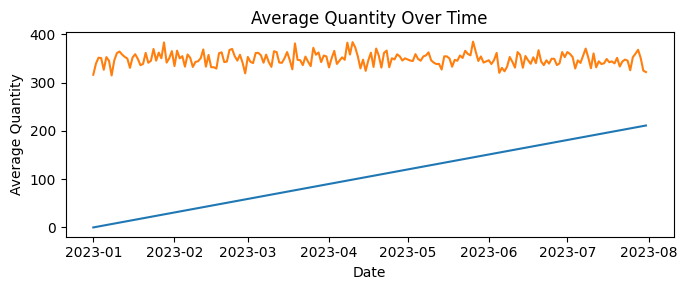

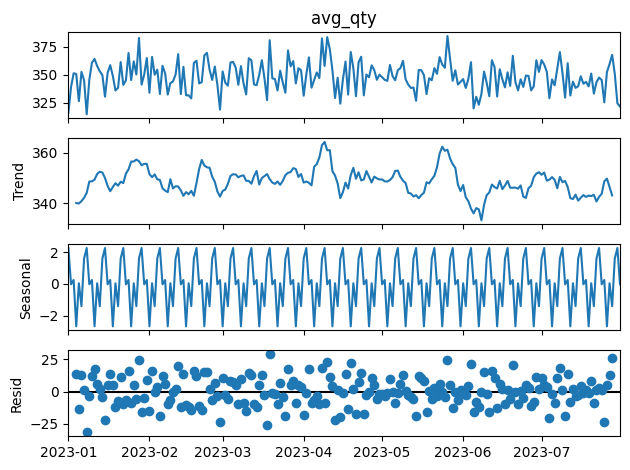

c:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\srira\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [160]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose


# Visualize the data
plt.figure(figsize=(7, 3))
plt.plot(train_data)
plt.title('Average Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Quantity')
plt.tight_layout()
plt.show()

# Decompose the time series for 'avg_qty' column
result = seasonal_decompose(train_data['avg_qty'], model='additive')
result.plot()
plt.tight_layout()
plt.show()

# Fit an ARIMA model
model = ARIMA(train_data['avg_qty'], order=(5, 1, 0))
fit_model = model.fit()





2. Forecast the future values for the month of August

In [161]:
# Forecast future values
forecast_steps = 31  
forecast = fit_model.forecast(steps=forecast_steps)
forecast_dates = pd.date_range(start='2023-08-01', periods=forecast_steps, freq='D')

#average quantity for each day in aug
avg_qty_per_day = forecast

# sum of average quantities round to nearest integer
sum_avg_qty = int(round(avg_qty_per_day.sum()))

for date, qty in zip(forecast_dates, avg_qty_per_day):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Avg Qty: {qty:.2f}")

print("Sum of Avg Qty for August (rounded):", sum_avg_qty)


Date: 2023-08-01, Avg Qty: 342.02
Date: 2023-08-02, Avg Qty: 339.97
Date: 2023-08-03, Avg Qty: 338.31
Date: 2023-08-04, Avg Qty: 338.34
Date: 2023-08-05, Avg Qty: 335.98
Date: 2023-08-06, Avg Qty: 335.85
Date: 2023-08-07, Avg Qty: 337.97
Date: 2023-08-08, Avg Qty: 337.49
Date: 2023-08-09, Avg Qty: 337.13
Date: 2023-08-10, Avg Qty: 337.34
Date: 2023-08-11, Avg Qty: 337.12
Date: 2023-08-12, Avg Qty: 337.08
Date: 2023-08-13, Avg Qty: 337.32
Date: 2023-08-14, Avg Qty: 337.24
Date: 2023-08-15, Avg Qty: 337.19
Date: 2023-08-16, Avg Qty: 337.23
Date: 2023-08-17, Avg Qty: 337.21
Date: 2023-08-18, Avg Qty: 337.20
Date: 2023-08-19, Avg Qty: 337.23
Date: 2023-08-20, Avg Qty: 337.22
Date: 2023-08-21, Avg Qty: 337.21
Date: 2023-08-22, Avg Qty: 337.22
Date: 2023-08-23, Avg Qty: 337.22
Date: 2023-08-24, Avg Qty: 337.22
Date: 2023-08-25, Avg Qty: 337.22
Date: 2023-08-26, Avg Qty: 337.22
Date: 2023-08-27, Avg Qty: 337.22
Date: 2023-08-28, Avg Qty: 337.22
Date: 2023-08-29, Avg Qty: 337.22
Date: 2023-08-

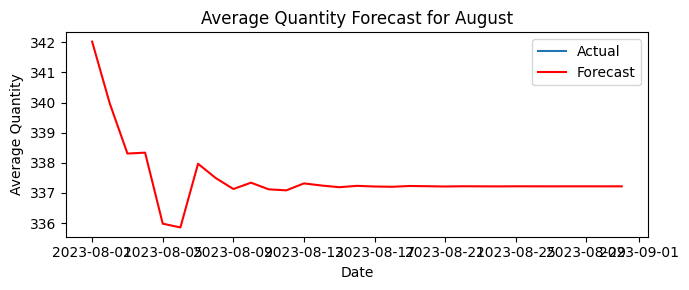

In [162]:
# forecast visualization
plt.figure(figsize=(7, 3))
plt.plot(actual_data_august.index, actual_data_august, label='Actual')
plt.plot(forecast_dates, avg_qty_per_day, label='Forecast', color='red')
plt.title('Average Quantity Forecast for August')
plt.xlabel('Date')
plt.ylabel('Average Quantity')
plt.tight_layout()
plt.legend()
plt.show()

INFERENCE : From here we can see that the average qty of the product P1000 required for the month of August 2023 is 10462. So the vendor must make sure that there is 10462 of product P1000 in stock to meet the sales of Aug 2023 

In [8]:
conn.close()